# Análisis Exploratorio de Datos

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Primeramente creamos unas funciones las cuales nos permitan conocer los datos unicos que hay en una columna de un dataframe
# y el tipo de dato que hay en una funciones, incluyendo los porcentajes 
def dataType(df):
        dfDict = {"name":[],"data_type":[],"not_null_%":[],"null_%":[],"null":[]}
        for column in df.columns:
                notNull=(df[column].count() / len(df)) * 100
                dfDict["name"].append(column)
                dfDict["data_type"].append(df[column].apply(type).unique())
                dfDict["not_null_%"].append(round(notNull, 2))
                dfDict["null_%"].append(round(100-notNull, 2))
                dfDict["null"].append(df[column].isnull().sum())
        dataTypeDf=pd.DataFrame(dfDict)
        return dataTypeDf

def dataPorcentaje(df, column):
    counts = df[column].value_counts()
    percentages = round(100*counts/len(df),2)
    dfResults = pd.DataFrame({
        "Cantidad":counts,
        "Porcentaje":percentages
    })
    return dfResults

In [55]:
# También creamos una funciión que nos arroje la puntuación acorde al análisis de sentimientos planteada.
def recommendScore(row):
    if not row['recommend']:
        return 0
    elif row['sentiment_analysis'] == 0:
        return 1
    elif row['sentiment_analysis'] == 1:
        return 2
    elif row['sentiment_analysis'] == 2:
        return 3
    else: 
        return None

Cargamos los datasets que usamos anteriormente en los dataframes correspondientes.

In [56]:
dfGames = pd.read_parquet('DB Steam/steam_games.parquet')
dfGamesGenre_sep = pd.read_parquet('DB Steam/GamesGenre_sep.parquet')
dfGamesPrice = pd.read_parquet('DB Steam/GamesPrice.parquet')


In [57]:
# Con la funcion dataType podemos ver el porcentaje de datos nulos en los dataframes.
# Veremos el porcentaje de datos nulos en dfGames
dataType(dfGames)

,name,data_type,not_null_%,null_%,null
0,genres,"[<class 'numpy.ndarray'>, <class 'NoneType'>]",89.78,10.22,3283
1,title,"[<class 'str'>, <class 'NoneType'>]",93.62,6.38,2050
2,release_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,93.03,6.97,2241
3,price,[<class 'float'>],95.71,4.29,1377
4,item_id,"[<class 'str'>, <class 'NoneType'>]",99.99,0.01,2
5,developer,"[<class 'str'>, <class 'NoneType'>]",89.73,10.27,3299
6,release_year,[<class 'int'>],100.00,0.00,0


In [58]:
# Consultamos el total de juegos únicos frente al total de juegos
print(len(dfGames['item_id'].unique()))
print(len(dfGames['item_id']))

32133
32135


In [59]:
# Hacemos la descripción de las variables numéricas de dfGames
dfGames.describe()

,release_date,price,release_year
count,29894,30758.000000,32135.000000
mean,2015-04-22 16:47:11.444436992,8.897676,1874.259841
min,1970-07-15 00:00:00,0.000000,0.000000
25%,2014-10-01 06:00:00,2.990000,2014.000000
50%,2016-04-19 00:00:00,4.990000,2016.000000
75%,2017-04-18 00:00:00,9.990000,2017.000000
max,2021-12-31 00:00:00,995.000000,2021.000000
std,NaN,16.340832,513.186115


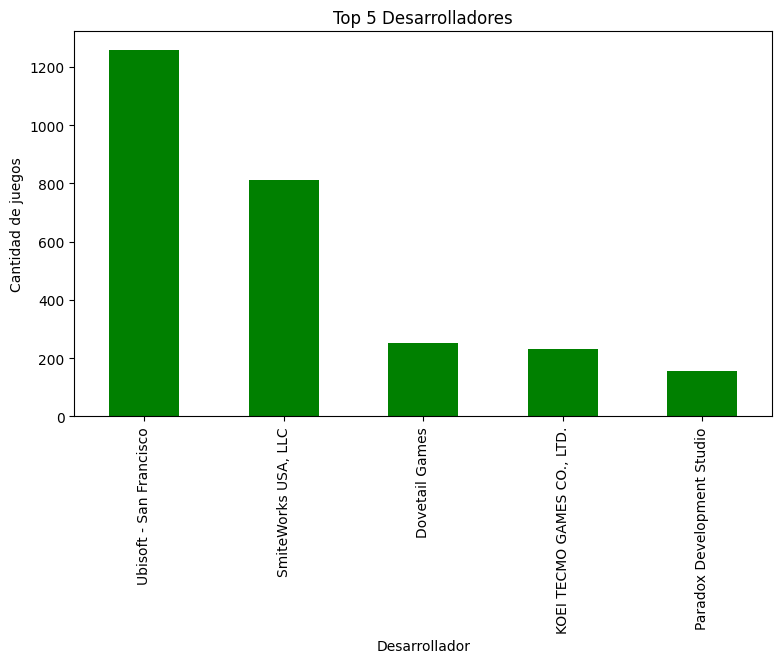

In [60]:
# Creamos un grafico que nos permita ver el top 5 de los desarrolladores con más juegos desarrollados.
# Para esto, primero contamos la cantidad de juegos por desarrollador 
dfGames['developer'].value_counts().head(5).plot(kind='bar', figsize=(9,5), color = 'green')
plt.title('Top 5 Desarrolladores')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de juegos')
plt.show()
# Ahora vemos el top 5 de los desarrolladores con más juegos desarrollados.

## Games Genres

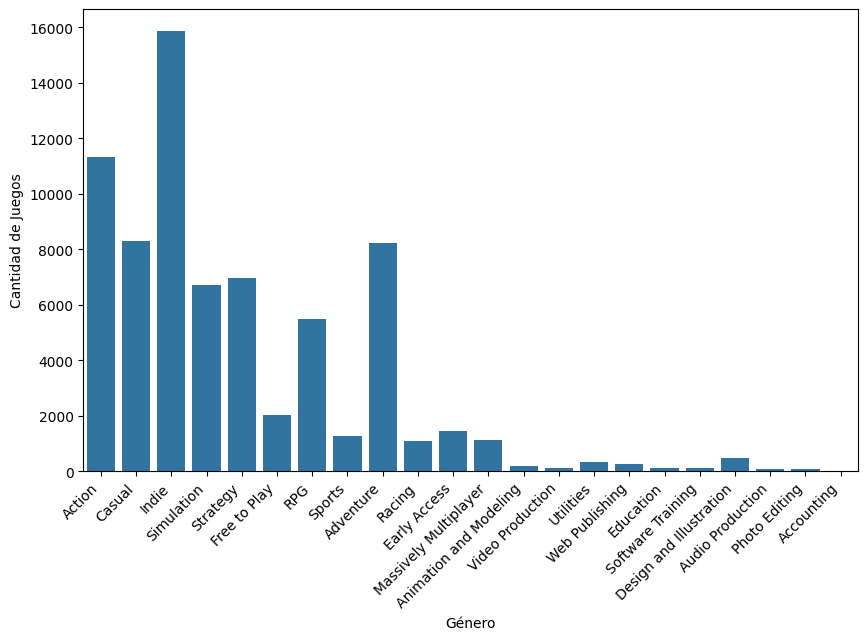

In [61]:
# Creamos un grafico donde se pueda ver la cantidad de juegos por cada genero.
# Hay que resaltar que un juego puede pertenecer a multiples generos, entonces estarán las veces necesarias. 
plt.figure(figsize = (10, 6))
sns.countplot(data = dfGamesGenre_sep, x = 'genres', orient='h')
plt.ylabel('Cantidad de Juegos')
plt.xlabel('Género')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [62]:
# Usamos la funcion dataPorcentaje para hacer el conteo de los generos que hay y que porcentaje tiene cada uno.
dataPorcentaje(dfGamesGenre_sep, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11321,15.82
Casual,8282,11.57
Adventure,8243,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


In [63]:
# Hacemos lo mismo con la columna 'release_year'
dataPorcentaje(dfGamesGenre_sep, 'release_year')[:10]

,Cantidad,Porcentaje
release_year,,
2017,25101,35.08
2016,17690,24.72
2015,12272,17.15
2014,6367,8.90
2013,3017,4.22
2012,2109,2.95
2011,987,1.38
2010,663,0.93
0,543,0.76


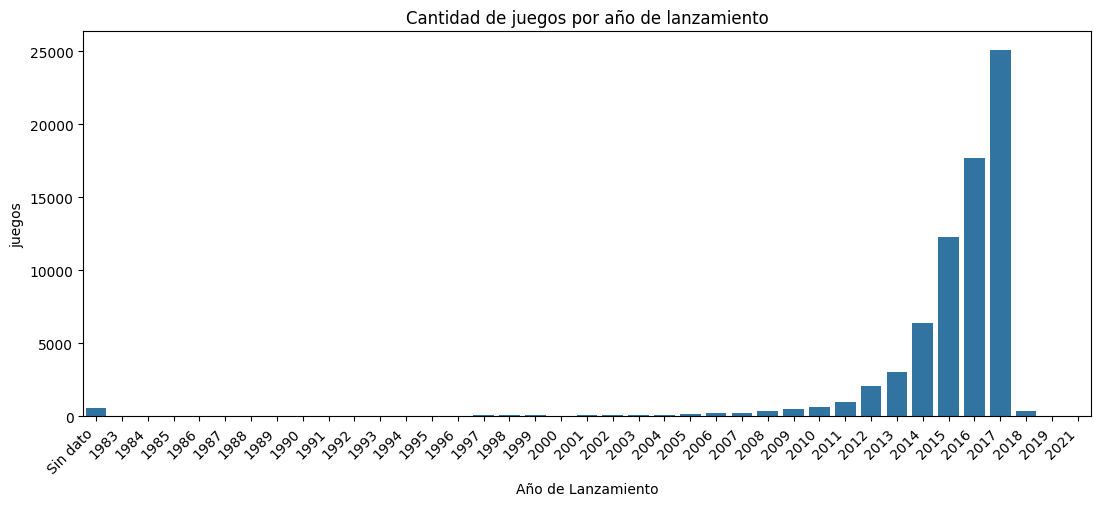

In [64]:
# Creamos un grafico que nos deje ver la cantidad de juegos lanzados por año
yearCount = dfGamesGenre_sep['release_year'].value_counts().sort_index().rename(index={0: 'Sin dato'})
plt.figure(figsize = (13, 5))
sns.barplot(x = yearCount.index, y = yearCount.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('juegos')
plt.title('Cantidad de juegos por año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.show()

## Games Prices

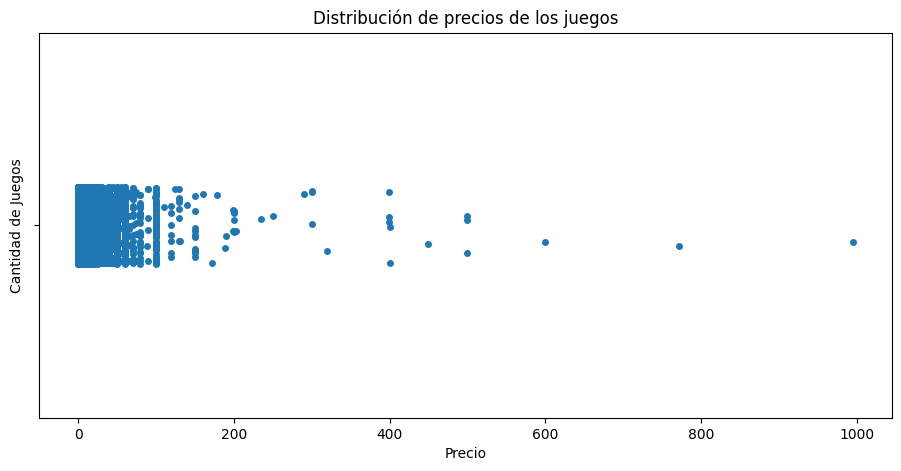

In [65]:
# Para la parte de los precios podemos hacer un gráfico de dispersión que nos muestre la distribución de los precios. 
# Creamos un dataframe que contenga los id únicos de los juegos y su respectivo precio
dfPrices = dfGamesPrice.groupby('item_id')['price'].unique().reset_index().explode('price')
plt.figure(figsize=(11, 5))
sns.stripplot(data=dfPrices, x='price')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de precios de los juegos')
plt.show()

In [66]:
# Hacemos la descripción de las medidas de tendecia central para los precios
dfGamesPrice.describe()

,price
count,30758.000000
mean,8.897676
std,16.340832
min,0.000000
25%,2.990000
50%,4.990000
75%,9.990000
max,995.000000


## User Items

In [67]:
# Cargamos los datasets en los dataframes que corresponden
dfItems_sep = pd.read_parquet('DB Steam/items_sep.parquet')
dfItems_count = pd.read_parquet('DB Steam/items_count.parquet')

In [68]:
dfItems_sep.head()

,user_id,item_id,playtime
0,76561197970982479,10,0.10
1,76561197970982479,20,0.00
2,76561197970982479,30,0.12
3,76561197970982479,40,0.00
4,76561197970982479,50,0.00


In [69]:
dfItems_count.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


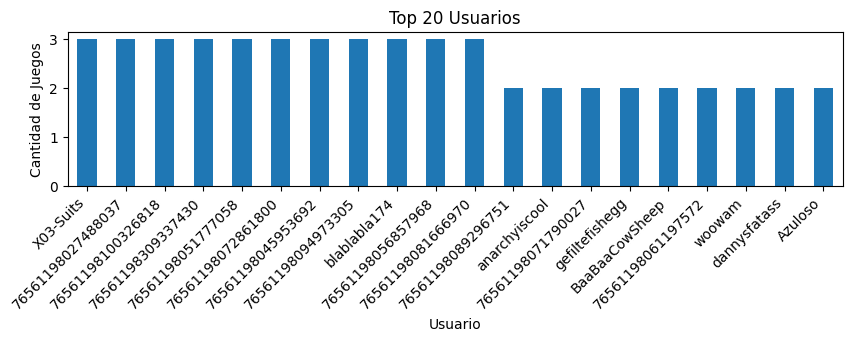

In [70]:
# Creamos un dataframe que nos permita visualizar la cantidad de juegos por usuario
dfItems_count['user_id'].value_counts().head(20).plot(kind='bar', figsize=(10,2))
plt.title('Top 20 Usuarios')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')
plt.show()
# Creamos un dataframe que nos permita visualizar la cantidad de juegos por usuario

Text(0.5, 1.0, 'Acumulación de horas jugadas')

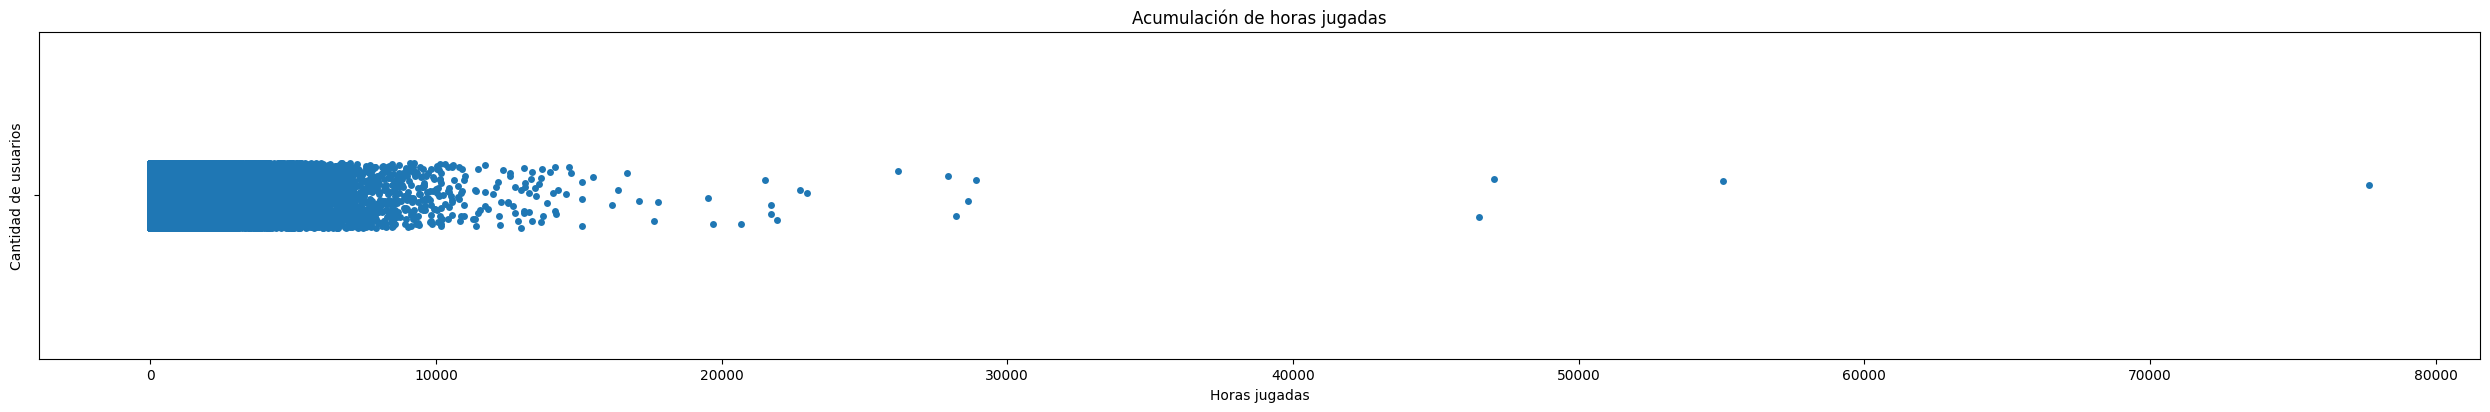

In [71]:
# Creamos un grafico que nos permita visualizar la acumulación de horas jugadas por los usuarios
horasJugadas = dfItems_sep.groupby('user_id')['playtime'].sum().reset_index()
plt.figure(figsize=(25, 4))
sns.stripplot(data= horasJugadas, x='playtime')
plt.xlabel('Horas jugadas')
plt.ylabel('Cantidad de usuarios')
plt.tight_layout()
plt.title('Acumulación de horas jugadas')


In [72]:
# Hacemos el calculo del tiempo total de juego por cada usuario
dfItems_sep.groupby('user_id')['playtime'].sum().sort_values( ascending = False)


user_id
REBAS_AS_F-T         77673.29
shinomegami          55058.33
Sp3ctre              47047.69
DownSyndromeKid      46506.40
Terminally-Chill     28900.07
                       ...   
76561198095784353        0.00
76561198095815730        0.00
76561198095817502        0.00
76561198032143135        0.00
76561198065875604        0.00
Name: playtime, Length: 87626, dtype: float64

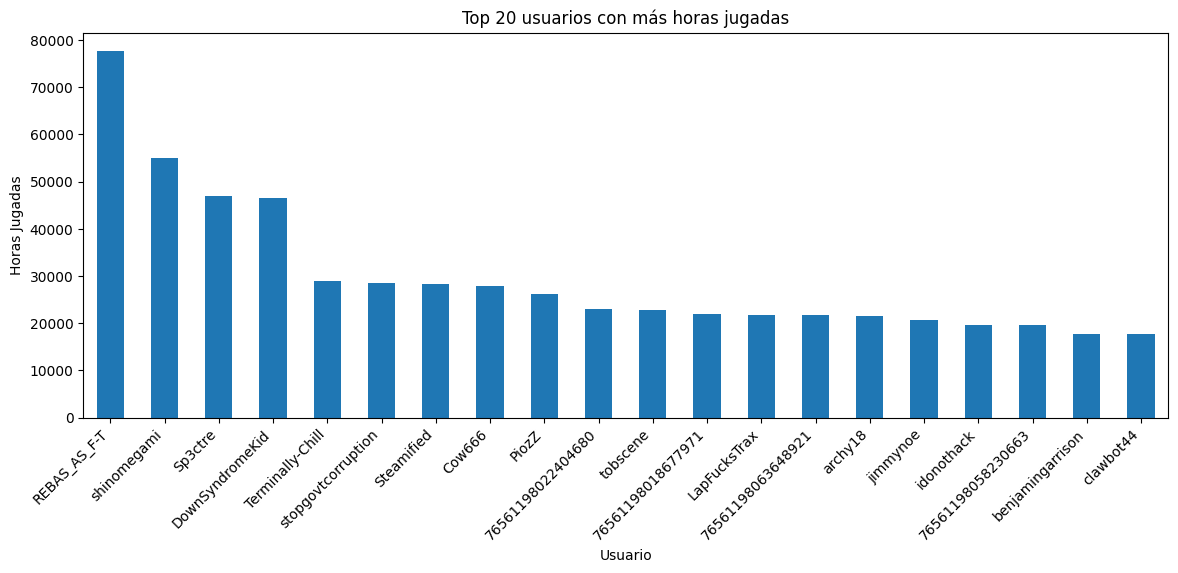

In [73]:
# Hacemos el grafico que nos muestra el top 20 de los usuarios con más horas jugadas 
plt.figure(figsize=(14, 5))
dfItems_sep.groupby('user_id')['playtime'].sum().sort_values(ascending=False)[:20].plot(kind='bar')
plt.xlabel('Usuario')
plt.ylabel('Horas Jugadas')
plt.title('Top 20 usuarios con más horas jugadas')
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
# Hacemos la descripción de las medidas de tendencia central para este dataframe 
dfItems_sep.describe()

,playtime
count,5.153209e+06
mean,1.652497e+01
std,9.030340e+01
min,0.000000e+00
25%,0.000000e+00
50%,5.700000e-01
75%,5.920000e+00
max,1.071288e+04


In [75]:
# Para lograr una mejor vista de las medidas de tendencia central hacemos lo siguiente:
medTen = dfItems_sep['playtime'].astype(float).describe()
print(f'El tiempo de juego promedio (mean) de los juegos es de: {round(medTen[1],2)} horas')
print(f'El 75% de los juegos tienen un tiempo de juego menor de: {medTen[6]} horas')
print(f'El 50% de los juegos tienen un tiempo de juego menor de: {round(medTen[5],2)} horas')

El tiempo de juego promedio (mean) de los juegos es de: 16.52 horas
El 75% de los juegos tienen un tiempo de juego menor de: 5.92 horas
El 50% de los juegos tienen un tiempo de juego menor de: 0.57 horas


### User Items Count

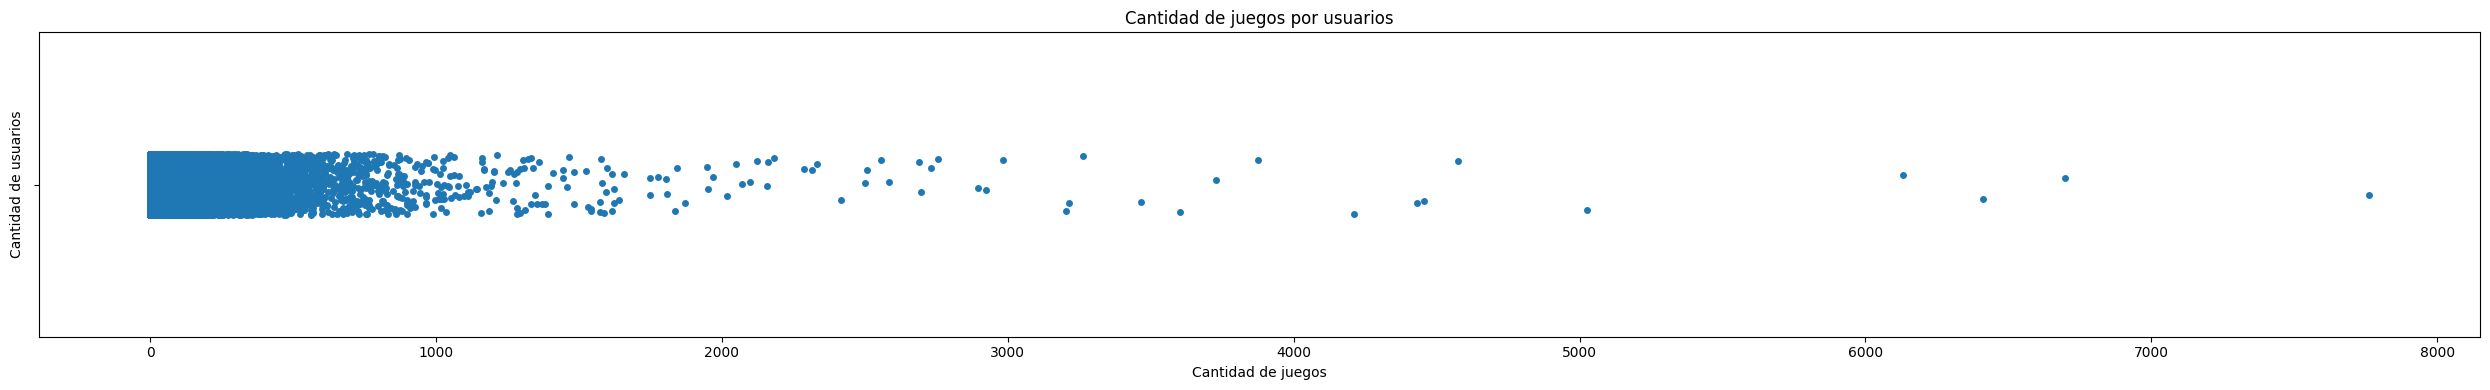

In [76]:
# Creamos un gráfico que nos permita ver la cantidad de juegos por usuario
# Agrupamos por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
dfItems_count = dfItems_count.sort_values('items_count', ascending=False)
plt.figure(figsize=(25, 4))
sns.stripplot(data=dfItems_count, x='items_count')
plt.xlabel('Cantidad de juegos')
plt.ylabel('Cantidad de usuarios')
plt.title('Cantidad de juegos por usuarios')
plt.tight_layout()
plt.show()

In [77]:
# Hacemos la descripción de las medidas de TC para saber las cantidades de items usados por usuarios 
dfItems_count.describe()

,items_count
count,88310.000000
mean,58.353629
std,122.312095
min,0.000000
25%,3.000000
50%,26.000000
75%,73.000000
max,7762.000000


<Figure size 1800x500 with 0 Axes>

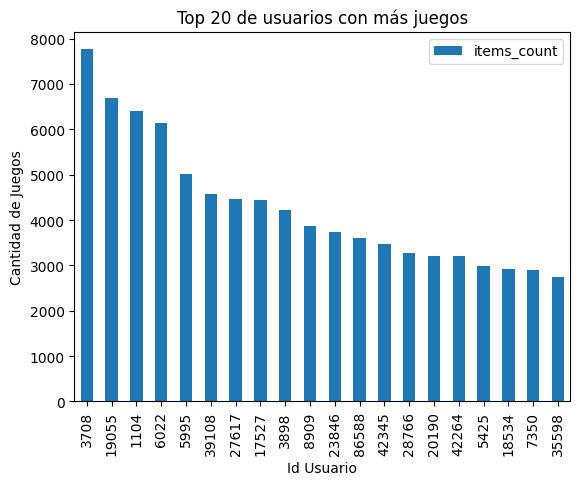

In [78]:
# Hacemos un grafico donde podamos ver el top de usuarios con más cantidad de juegos usados 
# Cabe resaltar que el top se está haciendo por id, no por user_id
plt.figure(figsize=(18, 5))
dfItems_count[:20].plot(kind='bar')
plt.xlabel('Id Usuario')
plt.ylabel('Cantidad de Juegos')
plt.title('Top 20 de usuarios con más juegos')
plt.show()

## User Review

In [79]:
# Se leen los datasets correspondientes para este apartado
dfReviews = pd.read_parquet('DB Steam/Reviews.parquet')
Reviews_sep = pd.read_parquet('DB Steam/Reviews_sep_sentiment.parquet')

In [80]:
dfReviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'helpful': 'No ratings yet', 'i..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'helpful': '15 of 20 people (75..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'helpful': 'No ratings yet', 'i..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'helpful': '2 of 2 people (100%..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [81]:
Reviews_sep

,user_id,recommend,item_id,review_date,review_year,sentiment_analysis
0,76561197970982479,True,1250,2011-11-05,2011,2
1,76561197970982479,True,22200,2011-07-15,2011,2
2,76561197970982479,True,43110,2011-04-21,2011,2
3,js41637,True,251610,2014-06-24,2014,2
4,js41637,True,227300,2013-09-08,2013,2
...,...,...,...,...,...,...
59300,76561198312638244,True,70,NaT,<NA>,2
59301,76561198312638244,True,362890,NaT,<NA>,2
59302,LydiaMorley,True,273110,NaT,<NA>,2
59303,LydiaMorley,True,730,NaT,<NA>,2


In [82]:
Reviews_sep.sort_values(by = 'review_year')

,user_id,recommend,item_id,review_date,review_year,sentiment_analysis
41068,76561197988318026,True,440,2010-12-18,2010,2
29807,farsel,True,24010,2010-11-19,2010,2
29806,farsel,True,8800,2010-11-24,2010,2
9683,76561198023634778,True,440,2010-11-26,2010,2
29802,farsel,True,12900,2010-11-26,2010,2
...,...,...,...,...,...,...
59300,76561198312638244,True,70,NaT,<NA>,2
59301,76561198312638244,True,362890,NaT,<NA>,2
59302,LydiaMorley,True,273110,NaT,<NA>,2
59303,LydiaMorley,True,730,NaT,<NA>,2


In [83]:
# Veremos el porcentaje de valores nulos para el dataframe 'Reviews_sep' 
dataType(Reviews_sep)

,name,data_type,not_null_%,null_%,null
0,user_id,[<class 'str'>],100.00,0.00,0
1,recommend,[<class 'bool'>],100.00,0.00,0
2,item_id,[<class 'str'>],100.00,0.00,0
3,review_date,[<class 'pandas._libs.tslibs.timestamps.Timest...,82.94,17.06,10119
4,review_year,[<class 'float'>],82.94,17.06,10119
5,sentiment_analysis,[<class 'str'>],100.00,0.00,0


In [84]:
# Podemos ver que hay valores nulos las columnas 'review_year' y 'review_date, entonces consultaremos los valores unicos no nulos
Reviews_sep['review_year'].unique()

<IntegerArray>
[2011, 2014, 2013, <NA>, 2015, 2012, 2010]
Length: 7, dtype: Int64

In [85]:
# Con la función dataPorcentaje calculamos los porcentajes de las columnas 'Sentiment_Analysis' y 'Recommend'
dataPorcentaje(Reviews_sep, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
2,37418,63.09
1,12275,20.70
0,9612,16.21


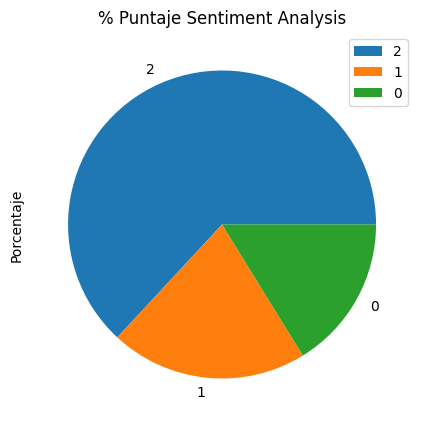

In [86]:
# Graficamos en un diagrama de torta para visualizar mejor la distribución de los porcentajes
data = dataPorcentaje(Reviews_sep, 'sentiment_analysis')
data.plot.pie(y='Porcentaje', figsize=(5, 5))
plt.title('% Puntaje Sentiment Analysis')
plt.show()

In [87]:
dataPorcentaje(Reviews_sep, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,52473,88.48
False,6832,11.52


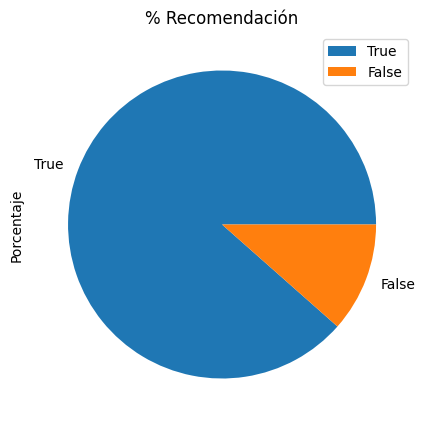

In [88]:
data = dataPorcentaje(Reviews_sep, 'recommend')
data.plot.pie(y='Porcentaje', figsize=(5, 5))
plt.title('% Recomendación')
plt.show()

In [89]:
# Creamos un dataframe que nos deje ver las combinaciones de análisis de sentimiento y recomendación, sus conteos y porcentajes. 
dfGrouped = Reviews_sep.groupby(['sentiment_analysis', 'recommend'])
# Cantidad de reviews 
dfGroupedSize = dfGrouped.size()
# Porcentaje 
dfGroupedPercent = dfGroupedSize / len(Reviews_sep) * 100

RecommendAnalysis = pd.DataFrame({'Cantidad': dfGroupedSize, 'Porcentaje': dfGroupedPercent})
RecommendAnalysis

Cantidad  Porcentaje
sentiment_analysis recommend                      
0                  False          2913    4.911896
                   True           6699   11.295844
1                  False          1488    2.509063
                   True          10787   18.189023
2                  False          2431    4.099148
                   True          34987   58.995026

In [90]:
# Consultamos la cantidad de usuarios que hicieron un review escrito 
len(Reviews_sep['user_id'].unique())

25458

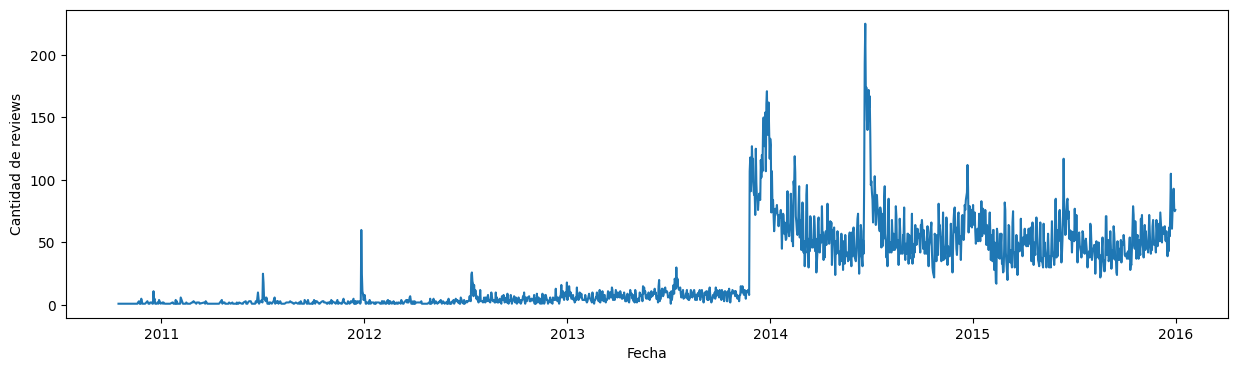

In [91]:
# Creamos una gráfica con la cantidad de reseñas por fecha utilizando un dataframe que no contenga las reseñas con datos de fecha nulos.
df = pd.DataFrame(Reviews_sep.dropna())
dfCount = df.groupby('review_date').count()

plt.figure(figsize = (15, 4))
sns.lineplot(data = dfCount, x = 'review_date', y = 'recommend')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de reviews')
plt.show()


### Pre-ML
El sistema de recomendación se basa en la recomendación juego-juegos; donde se ingesta el nombre de un juego y a partir de eso, se recomienden juegos similares. Para que sean similares, se tomará en cuenta la similitud en cuanto a género, porcentaje de recomendación, puntuación del análisis de sentimiento y el número de reseñas. 

In [92]:
dfGames = pd.read_parquet('DB Steam/steam_games.parquet')
dfGames = dfGames[['item_id', 'title']]
dfGamesGenre = pd.read_parquet('DB Steam/GamesGenre.parquet')
dfGamesGenre = dfGamesGenre[['item_id', 'genres']]
Reviews_sep = pd.read_parquet('DB Steam/Reviews_sep_sentiment.parquet')
Reviews_sep = Reviews_sep[['user_id', 'item_id', 'recommend', 'sentiment_analysis']]

In [93]:
dfGames.head()

,item_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,None


In [94]:
dfGamesGenre.head()

,item_id,genres
0,761140,"[Action, Casual, Indie, Simulation, Strategy]"
1,643980,"[Free to Play, Indie, RPG, Strategy]"
2,670290,"[Casual, Free to Play, Indie, Simulation, Sports]"
3,767400,"[Action, Adventure, Casual]"
4,772540,"[Action, Adventure, Simulation]"


In [95]:
Reviews_sep.head()

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,2


In [96]:
# Creamos un dataframe nuevo que se utilizará en el modelo para el sistema de recomendación.

# Primero convertimos el tipo de dato de sentiment_analysis a int
Reviews_sep['sentiment_analysis'] = Reviews_sep['sentiment_analysis'].astype(int)

# Creamos el nuevo dataframe que une los reviews a los juegos correspondientes 
dfMachineLearning = pd.merge(Reviews_sep, dfGames, on ='item_id', how ='left')
dfMachineLearning.head()

,user_id,item_id,recommend,sentiment_analysis,title
0,76561197970982479,1250,True,2,Killing Floor
1,76561197970982479,22200,True,2,Zeno Clash
2,76561197970982479,43110,True,2,NaN
3,js41637,251610,True,2,NaN
4,js41637,227300,True,2,Euro Truck Simulator 2


In [97]:
# Usamos dataType para ver el porcentaje de datos nulos del nuevo dataframe
dataType(dfMachineLearning)

,name,data_type,not_null_%,null_%,null
0,user_id,[<class 'str'>],100.00,0.00,0
1,item_id,[<class 'str'>],100.00,0.00,0
2,recommend,[<class 'bool'>],100.00,0.00,0
3,sentiment_analysis,[<class 'int'>],100.00,0.00,0
4,title,"[<class 'str'>, <class 'float'>, <class 'NoneT...",85.39,14.61,8662


In [98]:
# Como vemos, la columna 'title' tiene datos nulos, así que los eliminaremos 
dfMachineLearning = dfMachineLearning.dropna(subset = ['title'])
dfMachineLearning.head()

,user_id,item_id,recommend,sentiment_analysis,title
0,76561197970982479,1250,True,2,Killing Floor
1,76561197970982479,22200,True,2,Zeno Clash
4,js41637,227300,True,2,Euro Truck Simulator 2
5,js41637,239030,True,2,"Papers, Please"
6,evcentric,248820,True,2,Risk of Rain


In [99]:
# Usamos la función RecommendScore que habíamos creado al inicio, para descartar los reviews negativos y luego calificar.
dfMachineLearning['score'] = dfMachineLearning.apply(recommendScore, axis = 1)
dfMachineLearning = dfMachineLearning[['user_id', 'title', 'score']]
dfMachineLearning.head()

,user_id,title,score
0,76561197970982479,Killing Floor,3
1,76561197970982479,Zeno Clash,3
4,js41637,Euro Truck Simulator 2,3
5,js41637,"Papers, Please",3
6,evcentric,Risk of Rain,3


In [100]:
dataType(dfMachineLearning)

,name,data_type,not_null_%,null_%,null
0,user_id,[<class 'str'>],100.0,0.0,0
1,title,[<class 'str'>],100.0,0.0,0
2,score,[<class 'int'>],100.0,0.0,0


In [101]:
# Para relacionar mejor nuestras variables usamos una pivot_table, con 'user_id' como indices, los juegos como columnas y los valores como score
dfMachineLearning = dfMachineLearning.pivot_table(index=['user_id'], columns=['title'], values=['score'])
dfMachineLearning

score  \
title        ! That Bastard Is Trying To Steal Our Gold !   
user_id                                                     
--000--                                               NaN   
--ace--                                               NaN   
--ionex--                                             NaN   
-2SV-vuLB-Kg                                          NaN   
-Azsael-                                              NaN   
...                                                   ...   
zvanik                                                NaN   
zwanzigdrei                                           NaN   
zy0705                                                NaN   
zynxgameth                                            NaN   
zyr0n1c                                               NaN   

                                                                              \
title        //N.P.P.D. RUSH//- The milk of Ultraviolet 0RBITALIS 10,000,000   
user_id                                                                        
--000--                                             NaN       NaN        NaN   
--ace--                                             NaN       NaN        NaN   
--ionex--                                           NaN       NaN        NaN   
-2SV-vuLB-Kg                                        NaN       NaN        NaN   
-Azsael-                                            NaN       NaN        NaN   
...                                                 ...       ...        ...   
zvanik                                              NaN       NaN        NaN   
zwanzigdrei                                         NaN       NaN        NaN   
zy0705                                              NaN       NaN        NaN   
zynxgameth                                          NaN       NaN        NaN   
zyr0n1c                                             NaN       NaN        NaN   

                                \
title        100% Orange Juice   
user_id                          
--000--                    NaN   
--ace--                    NaN   
--ionex--                  NaN   
-2SV-vuLB-Kg               NaN   
-Azsael-                   NaN   
...                        ...   
zvanik                     NaN   
zwanzigdrei                NaN   
zy0705                     NaN   
zynxgameth                 NaN   
zyr0n1c                    NaN   

                                                                             \
title        100% Orange Juice - Krila &amp; Kae Character Pack 1001 Spikes   
user_id                                                                       
--000--                                                     NaN         NaN   
--ace--                                                     NaN         NaN   
--ionex--                                                   NaN         NaN   
-2SV-vuLB-Kg                                                NaN         NaN   
-Azsael-                                                    NaN         NaN   
...                                                         ...         ...   
zvanik                                                      NaN         NaN   
zwanzigdrei                                                 NaN         NaN   
zy0705                                                      NaN         NaN   
zynxgameth                                                  NaN         NaN   
zyr0n1c                                                     NaN         NaN   

                                     \
title        12 Labours of Hercules   
user_id                               
--000--                         NaN   
--ace--                         NaN   
--ionex--                       NaN   
-2SV-vuLB-Kg                    NaN   
-Azsael-                        NaN   
...                             ...   
zvanik                          NaN   
zwanzigdrei                     NaN   
zy0705                          NaN   
zynxgameth              

In [102]:
# Transformamos el dataframe creado a formato parquet para poder ser utilizado en el modelo
dfMachineLearning.to_parquet('DB Steam/machineLearning.parquet', index = True)